Importanto bibliotecas necessárias

In [84]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**


**Tema e Objetivo**


**Base de Dados**


**Dicionário da base de dados**

- **Cód**: código dado àquela cidade.
- **Município**: nome do município.
- **PIB_per_capita**: média salarial de cada pessoa do município.
- **Trat.Água_Filtrada**: quantidade de água filtrada disponível.
- **População_residente**: total de pessoas residindo na cidade.
- **%idosos_resid_como_out_parente**: proporção de idosos (60 anos ou mais de idade) que residem em domicílios como outro parente ou como agregado, ou seja, não chefiam, nem são cônjuges do chefe do domicílio em que residem.
- **Taxa_de_analfabetismo**: porcentagem de pessoas analfabetas no município.
- **Taxa_de_desemprego_16a_e+**: Proporção (%) da população residente economicamente ativa de 16 anos e mais que se encontra sem trabalho na semana de referência, em determinado espaço geográfico, no ano considerado.
- **Jogado em terreno baldio ou logradouro**: quantidade de lixo por residência jogado em terreno baldio ou logradouro público [tonelada].
- **Jogado em rio, lago ou mar**: quantidade de lixo por residência jogado em rio, lado ou mar da cidade [tonelada].
- **Coberturas Vacinais**

**Features considerados**

A partir da análise das informações contidas na base de dados, é possível identificar que nem todas as colunas dessa base possuem informações relevantes para o objetivo de prever o número de desistências em cursos de graduação. Algumas colunas possuem informações redundantes, e outras simplesmente representam códigos que fogem do interesse da análise. Portanto, foi selecionado um conjunto específico de colunas que podem ser mais pertinentes para a construção do modelo preditivo. Essas colunas, que representarão as "Features" ou variáveis independentes, são as seguintes:

    Nome da Instituição
    Categoria Administrativa
    Organização Acadêmica
    Código da Unidade Federativa do Curso
    Código do Município do Curso
    Grau Acadêmico
    Modalidade de Ensino
    Nome da área do Curso segundo a classificação CINE BRASIL
    Ano de Ingresso
    Ano de Referência
    Quantidade de Ingressantes no Curso
    Quantidade de Permanência no Curso no ano de referência
    Quantidade de Concluintes no Curso no ano de referência
    
    
**Variável de Destino (Target)**

Como o objetivo principal é prever o número de desistências em cursos de graduação, a variável de destino ou "Target" que será previsto é a "Quantidade de Desistência no Curso no ano de referência". Esta variável é fundamental, pois representa o número de alunos que abandonaram o curso durante o ano de referência, e o objetivo é entender os fatores que podem influenciar essa taxa de desistência.

A seleção cuidadosa das colunas de interesse e a escolha da variável de destino são passos essenciais para a construção de um modelo preditivo preciso e informativo. Com essas informações será possível realizar a análise e construção de modelos que permitirão prever e compreender as desistências em cursos de graduação.



# Manipulando as planilhas de dados

In [85]:
dados_aguafiltrada0 =  pd.read_excel('planilhas/Água_Filtrada_por_município.xlsx')
dados_popmunicipio0 =  pd.read_excel('planilhas/População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('planilhas/Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('planilhas/Porcentagem_de_Idosos_nas_Casas.xlsx')
# dados_lixo0 = pd.read_excel('planilhas/Lixo_Municipio.xlsx')
dados_desemprego0 = pd.read_excel('planilhas/Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('planilhas/Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('planilhas/Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('planilhas/Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('planilhas/Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
# dados_escolariedade0 = pd.read_excel('planilhas/Escolariedade.xlsx')
dados_idadepopulacional0 = pd.read_excel('planilhas/Idade_população.xlsx')
dados_tuberculose0 = pd.read_excel('planilhas/Tuberculose.xlsx')
dados_diabetes0= pd.read_excel('planilhas/Tuberculosos_com_diabetes.xlsx')
dados_tuber_vacinacao0 = pd.read_excel('planilhas/tuberculose vacinacao.xlsx')
dados_ppl0 = pd.read_excel('planilhas/tuberculose_em_ppl.xlsx')
dados_letalidade0 = pd.read_excel('planilhas/tuberculose_letalidade.xlsx')
dados_poprua0 = pd.read_excel('planilhas/tuberculose_pop_sit_rua.xlsx')
dados_alcolismo0 = pd.read_excel('planilhas/tuberculosos e alcolismo.xlsx')
dados_tabagismo0 = pd.read_excel('planilhas/tuberculosos e tabagismo.xlsx')
dados_outrasdoencas0 = pd.read_excel('planilhas/tuberculosos_com_outras_doenças.xlsx')

### Limpando as planilhas de dados

In [86]:
#Função de limpeza
#Função que separa o código do nome do município
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Município" in colunas:
        planilha[['Código do Município', 'Nome do Município']] = planilha['Município'].str.split(' ', n=1, expand=True)
        plan = planilha.drop('Município', axis=1)
        planilha_limpa = plan.drop('Nome do Município', axis=1)
    else: 
        planilha_limpa = planilha
    return planilha_limpa

#função que remove as informações redundantes sobre turberculose
#remove os dados ignorados e os dados com não, pois só me interessa sim e total
def remove_colunas_desnecessarias(planilha):
    colunas = list(planilha)
    if 'Ign/Branco' in colunas:
        del planilha['Ign/Branco']
    if 'Não' in colunas: 
        del planilha['Não']
    if 'Total' in colunas: 
        del planilha['Total']
    return planilha


#função de limpeza que substitui valores nulos (dados por -) por zero
def exclui_valor_hifen(planilha):
    return planilha.replace('-', '0')

In [87]:
list(dados_diabetes0)

['Município', 'Ign/Branco', 'Diabéticos', 'Não', 'Total']

- Limpando dados do DataSus

In [88]:
#Limpa linhas inúteis
df_aguafiltrada = dados_aguafiltrada0.drop(dados_aguafiltrada0.index[-2:])
df_popmunicipio = dados_popmunicipio0.drop(dados_popmunicipio0.index[-4:])
df_pib = dados_pib0.drop(dados_pib0.index[-11:])
df_idososcasas= dados_idososcasas0.drop(dados_idososcasas0.index[-4:])
# df_lixo1 = dados_lixo0.drop(dados_lixo0.index[-2:])
# df_lixo = df_lixo1.drop(labels=['Outro destino', 'Total'], axis=1)
df_desemprego = dados_desemprego0.drop(dados_desemprego0.index[-8:])
df_analfabetismo = dados_analfabetismo0.drop(dados_analfabetismo0.index[-4:])
df_coberturavacinal = dados_coberturavacinal0.drop(dados_coberturavacinal0.index[-3:])
df_cobequipessaudebasica = dados_cobequipessaudebasica0.drop(dados_cobequipessaudebasica0.index[-22:])
df_pessoasbaixarenda = dados_pessoasbaixarenda0.drop(dados_pessoasbaixarenda0.index[-10:])
# df_escolariedade = dados_escolariedade0.drop(dados_escolariedade0.index[-8:])
df_diabetes = remove_colunas_desnecessarias(dados_diabetes0)
df_ppl = remove_colunas_desnecessarias(dados_ppl0)
df_letalidade = remove_colunas_desnecessarias(dados_letalidade0)
df_poprua = remove_colunas_desnecessarias(dados_poprua0)
df_alcolismo = remove_colunas_desnecessarias(dados_alcolismo0)
df_tabagismo = remove_colunas_desnecessarias(dados_tabagismo0)
df_outrasdoencas = remove_colunas_desnecessarias(dados_outrasdoencas0)

#Separa os códios dos nomes e deixa as planilhas prontas para mergir
df_aguafiltrada[['Código do Município', 'Nome do Município']] = df_aguafiltrada['Município'].str.split(' ', n=1, expand=True)
dados_aguafiltrada = df_aguafiltrada.drop('Município', axis=1)
dados_popmunicipio = separa_codigo(df_popmunicipio)
dados_pib = separa_codigo(df_pib)
dados_idososcasas= separa_codigo(df_idososcasas)
# dados_lixo = separa_codigo(df_lixo)
dados_desemprego = separa_codigo(df_desemprego)
dados_analfabetismo = separa_codigo(df_analfabetismo)
dados_coberturavacinal = separa_codigo(df_coberturavacinal)
dados_cobequipessaudebasica = separa_codigo(df_cobequipessaudebasica)
dados_pessoasbaixarenda = separa_codigo(df_pessoasbaixarenda)
# dados_escolariedade = separa_codigo(df_escolariedade)
dados_idadepopulacional = separa_codigo(dados_idadepopulacional0)
dados_tuberculose = separa_codigo(dados_tuberculose0)
dados_diabetes = separa_codigo(df_diabetes)
dados_vacinabcg = separa_codigo(dados_tuber_vacinacao0)
dados_ppl = separa_codigo(df_ppl)
dados_letalidade = separa_codigo(df_letalidade)
dados_poprua = separa_codigo(df_poprua)
dados_alcolismo = separa_codigo(df_alcolismo)
dados_tabagismo = separa_codigo(df_tabagismo)
dados_outrasdoencas = separa_codigo(df_outrasdoencas)

- Limpando dados do IBGE

In [89]:
dados_IBGE = pd.read_excel('planilhas/IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('planilhas/IBGE_2010_saude_total.xlsx')
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


##### **Merging das bases de dados**

In [90]:
#Mergindo as planilhas do IBGE
result = pd.merge(dados_IBGE, dados_SAUDE, how='outer', on='Código IBGE do Município')
#Renomeando a coluna com os códigos de município
result.rename(columns={'Código IBGE do Município': 'Código do Município'}, inplace=True)
result["Código do Município"] = result["Código do Município"] .astype(str)
result_1 = pd.merge(dados_pib, dados_aguafiltrada, how='outer', on='Código do Município')
result_2 = pd.merge(result_1, dados_popmunicipio, how='outer', on='Código do Município')
result_3 = pd.merge(result_2 , dados_idososcasas, how='outer', on='Código do Município')
result_4 = pd.merge(result_3, dados_analfabetismo, how='outer', on='Código do Município')
result_5 = pd.merge(result_4, dados_desemprego, how='outer', on='Código do Município')
# result_6 = pd.merge(result_5, dados_lixo, how='outer', on='Código do Município')
result_7 = pd.merge(result_5, dados_coberturavacinal, how='outer', on='Código do Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='outer', on='Código do Município')
# result_9 = pd.merge(result_8, dados_escolariedade, how='outer', on='Código do Município')
result_10 = pd.merge(result_8, dados_tuberculose, how='outer', on='Código do Município')
result_10["Código do Município"] = result_10["Código do Município"] .astype(str)
result_11 = pd.merge(result_10, result, how='outer', on='Código do Município')
result_12 = pd.merge(result_11, dados_idadepopulacional, how='outer', on='Código do Município')
result_13 = pd.merge(result_12, dados_diabetes, how='outer', on='Código do Município')
result_14 = pd.merge(result_13, dados_vacinabcg, how='outer', on='Código do Município')
result_15 = pd.merge(result_14, dados_ppl, how='outer', on='Código do Município')
result_16 = pd.merge(result_15, dados_letalidade, how='outer', on='Código do Município')
result_17 = pd.merge(result_16, dados_poprua, how='outer', on='Código do Município')
result_18 = pd.merge(result_17, dados_alcolismo, how='outer', on='Código do Município')
result_19 = pd.merge(result_18, dados_tabagismo, how='outer', on='Código do Município')
result_20 = pd.merge(result_19, dados_outrasdoencas, how='outer', on='Código do Município')

df = result_20

##### **Bases de dados**

In [91]:
df2 = df.copy()
df2.columns

Index(['PIB_per_capita', 'Código do Município', 'Trat.Água_Filtrada',
       'Nome do Município', 'População_residente',
       '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo',
       'Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais',
       '%_população_com_renda_', 'Casos de Tuberculose',
       'Sigla da Unidade da Federação', 'Nome das Grandes Regiões',
       'IDHM 2010', 'Estabelecimentos de Saúde privado total',
       'Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos', 'BCG',
       'PPL', 'Óbito por tuberculose', 'Moradores de rua', 'Alcolismo',
       'Tabagismo', 'Doenças pré-existentes'],
      dtype='object')

In [92]:
quant = ['PIB_per_capita', 'Trat.Água_Filtrada', 'População_residente', '%idosos_resid_como_out_parente', 'Taxa_de_analfabetismo','Taxa_de_desemprego_16a_e+', 'Coberturas Vacinais', '%_população_com_renda_', 'IDHM 2010','Estabelecimentos de Saúde privado total','Estabelecimentos de Saúde público total', 'Menor 1 ano', '1 a 4 anos',
       '60 a 69 anos', '70 a 79 anos', '80 anos e mais', 'Diabéticos', 'BCG',
       'PPL', 'Óbito por tuberculose', 'Moradores de rua', 'Alcolismo',
       'Tabagismo', 'Doenças pré-existentes', 'Casos de Tuberculose']
var_quantitativas = df2[quant]
var_quantitativas = exclui_valor_hifen(var_quantitativas)
var_quantitativas.head()

,PIB_per_capita,Trat.Água_Filtrada,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Coberturas Vacinais,%_população_com_renda_,IDHM 2010,Estabelecimentos de Saúde privado total,...,80 anos e mais,Diabéticos,BCG,PPL,Óbito por tuberculose,Moradores de rua,Alcolismo,Tabagismo,Doenças pré-existentes,Casos de Tuberculose
0,10725.97,3573.0,24958.0,8.5,12.0,5.01,83.802871,48.42,0.641,4.0,...,169.0,0,445.0,0,NaN,0,1,0,0,4.0
1,15070.14,5285.0,92448.0,11.0,7.9,4.64,75.505515,31.05,0.702,22.0,...,642.0,4,1896.0,0,NaN,0,1,0,1,32.0
2,10968.00,751.0,6459.0,5.3,13.8,2.49,83.333333,48.17,0.650,1.0,...,55.0,0,100.0,0,NaN,0,0,0,0,2.0
3,15068.72,11856.0,80396.0,13.4,8.3,5.87,78.515834,32.10,0.718,21.0,...,818.0,2,1366.0,0,1.0,0,0,0,0,27.0
4,13024.11,1927.0,17424.0,11.6,10.4,5.24,88.863966,36.99,0.692,4.0,...,174.0,0,193.0,0,NaN,0,0,0,0,3.0


In [ ]:
#função relativiza per capta
def relativiza(planilha):
    
    quantitativas = ['Trat.Água_Filtrada', 'Estabelecimentos de Saúde privado total',
                    'Estabelecimentos de Saúde público total','Casos de Tuberculose']

    # Substituindo as colunas pela divisão
    for coluna in quantitativas:
        planilha[coluna] = planilha[coluna] / df['População_residente']

    return planilha

var_quantitativas = relativiza(var_quantitativas)
var_quantitativas.head()

In [ ]:
def condiciona(planilha):

    unioes = ['Diabéticos', ]
    
    

In [94]:
#função relativiza per capta
def relativiza(planilha):
    
    quantitativas = ['Trat.Água_Filtrada', 'Estabelecimentos de Saúde privado total',
                    'Estabelecimentos de Saúde público total','Casos de Tuberculose']

    # Substituindo as colunas pela divisão
    for coluna in quantitativas:
        planilha[coluna] = planilha[coluna] / df['População_residente']

    return planilha

var_quantitativas = relativiza(var_quantitativas)

<Axes: >

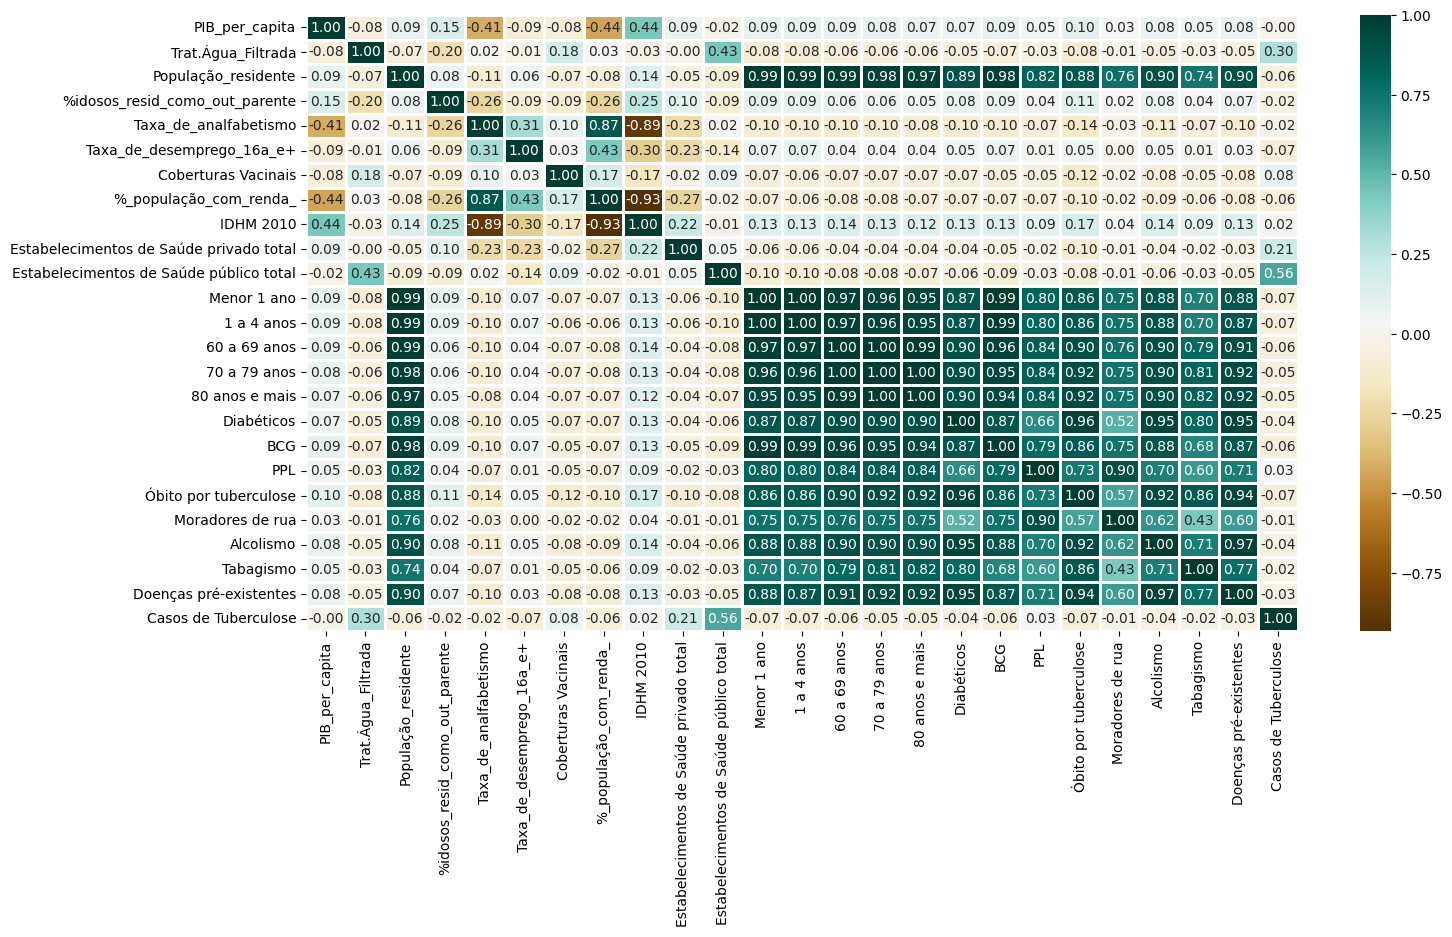

In [95]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas